Mengambil data harian kasus corona di Open Data Jabar

In [2]:
import requests
resp = requests.get('https://covid19-public.digitalservice.id/api/v1/sebaran_v2/jabar')

In [3]:
cov_id_raw = resp.json()
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw : %s.' %cov_id_raw.keys())


Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['status_code', 'data']).


In [4]:
cov_id_data = cov_id_raw['data']

In [5]:
print('Komponen cov_id_raw : %s.' %cov_id_data.keys())

Komponen cov_id_raw : dict_keys(['metadata', 'content']).


In [6]:
print(cov_id_data['metadata'])

{'last_update': '2021-06-29, 04:33:53'}


Terlihat bahwa data terakhir diupdate pada tanggal 29 Juni 2021 pukul 04:33:53

In [7]:
cov_content = cov_id_data['content']

In [8]:
import pandas as pd
cov_jabar = pd.DataFrame(cov_content)

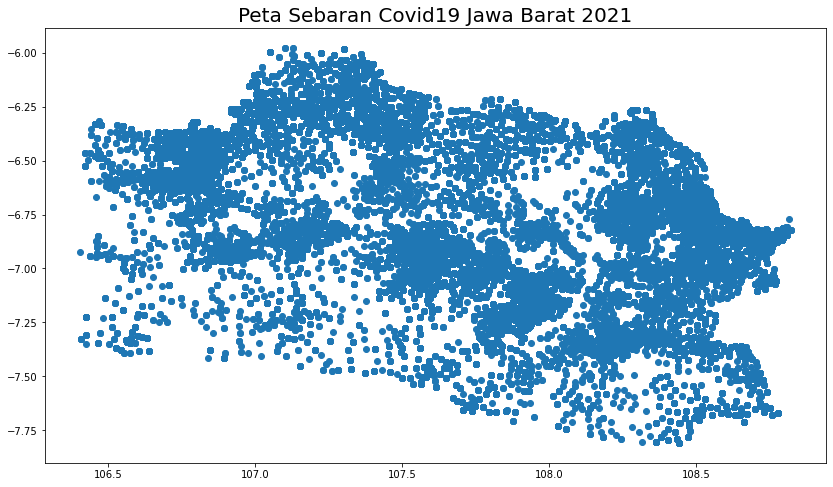

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.scatter(cov_jabar['longitude'], cov_jabar['latitude'])
plt.title('Peta Sebaran Covid19 Jawa Barat 2021', fontsize=20)
plt.show()

Berdasarkan peta diatas, sebaran titik merupakan zona yang telah terkena kasus covid19. Dimana terlihat sebaran titik-titik ini
hampir menutupi area di Jawa Barat, menandakan bahwa kasus covid19 di Jawa Barat hampir seluruh wilayahnya terkena infeksi.
Sementara masih ada area yang belum terkena infeksi (ditandai dengan belum adanya titik biru) yang dominan berada di wilayah
selatan Jawa Barat, yakni seperti Garut, Tasikmalaya, Cianjur, dan Sukabumi

In [13]:
import pandas as pd                        #membuat dataframe zona risiko. Sumber : Open Data Jabar
jabar = [
    ['Depok',-6.385589,106.830711,'sedang',1000],
    ['Tasikmalaya',-7.319563,108.202972,'sedang',1000],
    ['Ciamis',-7.3299,108.3323,'sedang',1000],
    ['Kuningan',-7.0138,108.5701,'sedang',1000],
    ['Bogor',-6.497641,106.828224,'sedang',1000],
    ['Bogor',-6.595038,106.816635,'sedang',1000],
    ['Cirebon',-6.737246,108.550659,'sedang',1000],
    ['Majalengka',-6.8364,108.2274,'sedang',1000],
    ['Sumedang',-6.8381,107.9275,'sedang',1000],
    ['Indramayu',-6.327583,108.324936,'sedang',1000],
    ['Subang',-6.571589,107.758736,'sedang',1000],
    ['Purwakarta',-6.538681,107.449944,'sedang',1000],
    ['Karawang',-6.3227,107.3376,'sedang',1000],
    ['Bekasi',-6.241586,106.992416,'sedang',1000],
    ['Pangandaran',-7.6833,108.6500,'sedang',1000],
    ['Sukabumi',-6.923700,106.928726,'sedang',1000],
    ['Cimahi',-6.8841,107.5413,'sedang',1000],
    ['Banjar',-7.374585,108.558189,'sedang',1000],
    ['Cianjur',-6.734679,107.041252,'sedang',1000],
    ['Bandung',-6.914864,107.608238,'tinggi',3000],
    ['Bandung',-6.905977,107.613144,'tinggi',3000],
    ['Bandung',-6.914744,107.609810,'tinggi',3000],
    ['Garut',-7.227906,107.908699,'sedang',1000],
    ['Bandung Barat',-7.025253,107.519760,'sedang',1000]]
features=['Kota','longitude','latitude','status','tingkat_status']
risk_map = pd.DataFrame(jabar, columns=features)

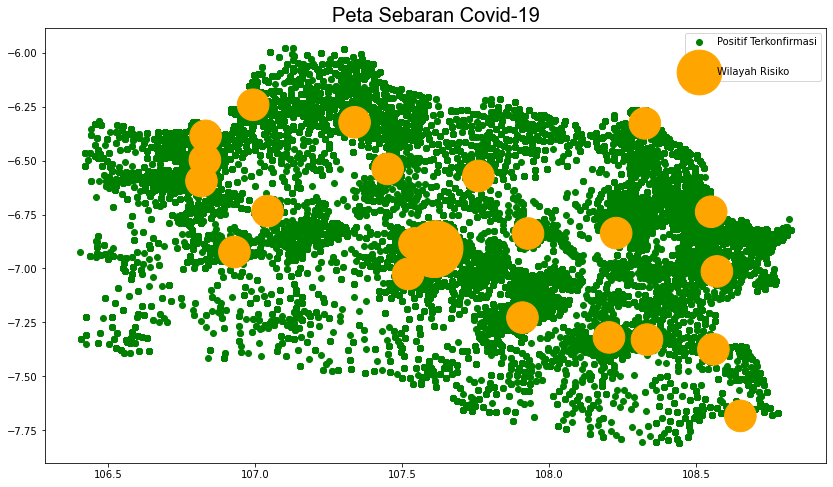

In [14]:
hfont = {'fontname':'Arial'}
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.scatter(cov_jabar['longitude'], cov_jabar['latitude'], c='green', label='Positif Terkonfirmasi')
plt.scatter(risk_map['latitude'],risk_map['longitude'], c='orange', s=risk_map['tingkat_status'], label='Wilayah Risiko')
plt.title('Peta Sebaran Covid-19', fontsize=20, **hfont)
plt.legend()
plt.legend(labelspacing=2)
plt.show()

Berdasarkan peta sebaran diatas, terlihat titik-titik berwarna hijau yang menandakan wilayah tersebut telah terkonfirmasi 
adanya kasus positif corona, yang mana titik-titik hijau ini hampi menutupi area Jawa Barat. Sementara titik-titik berwarna 
oranye menandakan bahwa wilayah tersebut memiliki tingkat risiko, semakin besar ukuran titik, maka semakin besar risiko 
terkena infeksi, seperti yang terjadi di wilayah Bandung, dimana ukuran titik oranye ini lebih besar dibandingkan dengan
wilayah lainnya. Menandakan bahwa Bandung adalah wilayah yang berrisiko tinggi terpapar virus corona. Melirik sebaran titik
hijau, wilayah Cianjur, Garut, Tasikmalaya, Sukabumi (Wilayah selatan) masih jarang, menandakan wilayah tersebut belum 
memiliki kasus positif corona.